# FIDE & Google Efficient Chess AI Challenge

In [3]:
# first let's make sure you have internet enabled
import requests
requests.get('http://www.google.com',timeout=10).ok

True

In [4]:
%%capture
# ensure we are on the latest version of kaggle-environments
!pip install --upgrade kaggle-environments

In [5]:
pip install chess

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


In [7]:
# set up the chess environment
from kaggle_environments import make
env = make("chess", debug=True)

c:\Users\USER\Desktop\Supahotfile\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


termcolor not installed, skipping dependency
No pygame installed, ignoring import


### Agent

In [18]:
%%writefile main.py
from Chessnut import Game
import subprocess
import os

class ChessEngine:
    def __init__(self, engine_path):
        # Check if the engine file exists
        if not os.path.exists(engine_path):
            raise FileNotFoundError(f"Engine file not found at {engine_path}")

        #  Initialize the subprocess
        self.engine = subprocess.Popen(
            [engine_path],
            stdin=subprocess.PIPE,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

    def _send_command(self, command):
        self.engine.stdin.write(command + "\n")
        self.engine.stdin.flush()

    def _read_output(self):
        output = self.engine.stdout.readline().strip()
        return output

    def get_best_move(self, fen, movetime=100):
        self._send_command(fen)
        best_move = None
        while True:
            best_move = self._read_output()
            if best_move:
                break
        return best_move

    def stop(self):
        self._send_command("quit")
        self.engine.terminate()
        self.engine.wait()


engine_path = r'C:\Users\USER\Desktop\Supahotfile\Kaggle\GoogleChessAI\engine\engine.exe'
engine = None

def chess_bot(obs):    
    global engine
    fen = obs['board']
    if engine is None:
        engine = ChessEngine(engine_path)
    return engine.get_best_move(fen)


Overwriting main.py


### Testing the agent

Agent exit status/reward/time left: 
	 ERROR / None / 10
	 DONE / 0 / 10





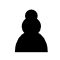
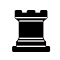
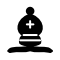
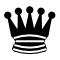
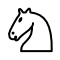
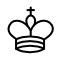
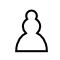
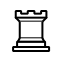
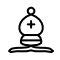
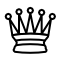
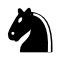
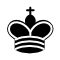

In [19]:
result = env.run(["main.py", "random"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=640, height=640) 